In [1]:
# import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
import spacy



In [2]:
# To ignore warinings
import warnings
warnings.filterwarnings('ignore')

In [3]:
tickets_df = pd.read_csv('/kaggle/input/multilingual-customer-support-tickets/helpdesk_customer_tickets.csv')

In [4]:
tickets_df

,id,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9
0,36,Anfrage zu den Spezifikationen und Anpassungso...,Sehr geehrtes Support-Team des Tech Online Sto...,"Sehr geehrter <name>,\n\nvielen Dank für Ihr I...",Request,Customer Service,medium,de,Tech Online Store,Product Support,Sales Inquiry,Technical Guidance,General Inquiry,NaN,NaN,NaN,NaN,NaN
1,39,Déconnexions fréquentes et plantages,Le client signale des déconnexions fréquentes ...,Nous allons enquêter sur le problème avec Zoom...,Incident,Product Support,high,fr,Software Development Company,Technical Support,Software Bug,Service Disruption,System Crash,Problem Resolution,Performance Tuning,NaN,NaN,NaN
2,243,Problema de sonido Dell XPS,"Problema con el sonido, manejando como devoluc...",Gracias por su correo electrónico. Procesaremo...,Problem,Returns and Exchanges,medium,es,Tech Online Store,Returns and Exchanges,Product Support,Customer Service,Refund Request,NaN,NaN,NaN,NaN,NaN
3,381,Assistance requise pour la configuration du ta...,"Cher support client,\n\nNotre client, <name>, ...","Cher <name>,\n\nMerci de nous avoir contactés....",Request,Product Support,medium,fr,Software Development Company,Technical Support,Product Support,General Inquiry,Problem Resolution,Training Request,NaN,NaN,NaN,NaN
4,663,Urgente: Assistência Imediata Necessária para ...,Caro Suporte ao Cliente da Firma de Consultori...,"Caro Cliente,\n\nRecebemos sua solicitação urg...",Incident,Human Resources,medium,pt,IT Consulting Firm,Urgent Issue,Payroll Issue,Technical Support,Service Disruption,Problem Resolution,Account Assistance,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,99421,Urgente: Problema de Conectividad del Router,"Estimado Soporte de Servicios de TI,\n\nEstamo...","Estimado <name>,\n\nGracias por ponerte en con...",Problem,IT Support,high,es,IT Services,Technical Support,Urgent Issue,Network Issue,Problem Resolution,Service Disruption,IT Support,NaN,NaN,NaN
596,99513,Necesito ayuda con el despliegue de un nuevo m...,"Estimado equipo de soporte de servicios de TI,...","Estimado <name>,\n\nGracias por ponerte en con...",Request,Technical Support,medium,es,IT Services,Technical Support,IT Support,Product Support,System Maintenance,Technical Guidance,NaN,NaN,NaN,NaN
597,99541,Necesito soporte urgente,"Estimado soporte al cliente, La pantalla tácti...","Estimado <name>,\n\nGracias por ponerte en con...",Problem,Technical Support,high,es,Tech Online Store,Technical Support,Urgent Issue,Hardware Failure,Problem Resolution,Product Support,System Maintenance,NaN,NaN,NaN
598,99603,Problema de Erro de Servidor,"Caro Suporte ao Cliente,\n\nNosso Serviço de C...","Caro <name>,\n\nObrigado por entrar em contato...",Incident,Service Outages and Maintenance,high,pt,IT Services,Technical Support,IT Support,Service Disruption,System Crash,Problem Resolution,NaN,NaN,NaN,NaN


In [5]:
tickets_df['language'].unique()

array(['de', 'fr', 'es', 'pt', 'en'], dtype=object)

### There are five different languages

In [6]:
tickets_df['queue'].unique()

array(['Customer Service', 'Product Support', 'Returns and Exchanges',
       'Human Resources', 'Billing and Payments', 'Technical Support',
       'IT Support', 'Sales and Pre-Sales', 'General Inquiry',
       'Service Outages and Maintenance'], dtype=object)

# Data cleaning

In [7]:
tickets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             600 non-null    int64  
 1   subject        599 non-null    object 
 2   body           600 non-null    object 
 3   answer         600 non-null    object 
 4   type           600 non-null    object 
 5   queue          600 non-null    object 
 6   priority       600 non-null    object 
 7   language       600 non-null    object 
 8   business_type  600 non-null    object 
 9   tag_1          600 non-null    object 
 10  tag_2          600 non-null    object 
 11  tag_3          600 non-null    object 
 12  tag_4          600 non-null    object 
 13  tag_5          432 non-null    object 
 14  tag_6          173 non-null    object 
 15  tag_7          56 non-null     object 
 16  tag_8          9 non-null      object 
 17  tag_9          0 non-null      float64
dtypes: float64

In [8]:
# the types of the columns are correct
# we have null in tags and that is ok, as not all tickets can have 9 tags
# check 1 null data in the subject, there is just one null data, if needed I will deal with it
tickets_df[tickets_df['subject'].isnull()]

,id,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9
6,717,NaN,"Dear Tech Online Store Customer Support,\n\nI ...","Dear <name>,\n\nThank you for contacting Tech ...",Problem,Returns and Exchanges,low,en,Tech Online Store,Technical Support,Product Support,Returns and Exchanges,Network Issue,Hardware Failure,Problem Resolution,NaN,NaN,NaN


In [9]:
# checking the columns
tickets_df.columns

Index(['id', 'subject', 'body', 'answer', 'type', 'queue', 'priority',
       'language', 'business_type', 'tag_1', 'tag_2', 'tag_3', 'tag_4',
       'tag_5', 'tag_6', 'tag_7', 'tag_8', 'tag_9'],
      dtype='object')

In [10]:
# checking for duplicates
tickets_df.duplicated().sum()
# there are no duplicates

0

### So far, everything seems good

# Text classification (traditional models)
### Train machine learning models to accurately classify email content into appropriate departments, improving ticket routing and handling.

In [11]:
# identify the queue based on the subject and body of the ticket
tickets_df[['subject', 'body', 'language', 'queue', 'tag_1', 'tag_2', 'tag_3', 'tag_4', 'tag_5', 'tag_6', 'tag_7', 'tag_8', 'tag_9']]

,subject,body,language,queue,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9
0,Anfrage zu den Spezifikationen und Anpassungso...,Sehr geehrtes Support-Team des Tech Online Sto...,de,Customer Service,Product Support,Sales Inquiry,Technical Guidance,General Inquiry,NaN,NaN,NaN,NaN,NaN
1,Déconnexions fréquentes et plantages,Le client signale des déconnexions fréquentes ...,fr,Product Support,Technical Support,Software Bug,Service Disruption,System Crash,Problem Resolution,Performance Tuning,NaN,NaN,NaN
2,Problema de sonido Dell XPS,"Problema con el sonido, manejando como devoluc...",es,Returns and Exchanges,Returns and Exchanges,Product Support,Customer Service,Refund Request,NaN,NaN,NaN,NaN,NaN
3,Assistance requise pour la configuration du ta...,"Cher support client,\n\nNotre client, <name>, ...",fr,Product Support,Technical Support,Product Support,General Inquiry,Problem Resolution,Training Request,NaN,NaN,NaN,NaN
4,Urgente: Assistência Imediata Necessária para ...,Caro Suporte ao Cliente da Firma de Consultori...,pt,Human Resources,Urgent Issue,Payroll Issue,Technical Support,Service Disruption,Problem Resolution,Account Assistance,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,Urgente: Problema de Conectividad del Router,"Estimado Soporte de Servicios de TI,\n\nEstamo...",es,IT Support,Technical Support,Urgent Issue,Network Issue,Problem Resolution,Service Disruption,IT Support,NaN,NaN,NaN
596,Necesito ayuda con el despliegue de un nuevo m...,"Estimado equipo de soporte de servicios de TI,...",es,Technical Support,Technical Support,IT Support,Product Support,System Maintenance,Technical Guidance,NaN,NaN,NaN,NaN
597,Necesito soporte urgente,"Estimado soporte al cliente, La pantalla tácti...",es,Technical Support,Technical Support,Urgent Issue,Hardware Failure,Problem Resolution,Product Support,System Maintenance,NaN,NaN,NaN
598,Problema de Erro de Servidor,"Caro Suporte ao Cliente,\n\nNosso Serviço de C...",pt,Service Outages and Maintenance,Technical Support,IT Support,Service Disruption,System Crash,Problem Resolution,NaN,NaN,NaN,NaN


In [12]:
tickets_df['queue'].unique()

array(['Customer Service', 'Product Support', 'Returns and Exchanges',
       'Human Resources', 'Billing and Payments', 'Technical Support',
       'IT Support', 'Sales and Pre-Sales', 'General Inquiry',
       'Service Outages and Maintenance'], dtype=object)

### we are going to classify the subject and body of the ticket based on its department, our target is 'queu' column, so for the first task we only need 3 columns

In [13]:
# dataframe for the first task, join subject and body, make two columns, one is label and the other is text
text_classification_df = tickets_df[['subject', 'body', 'queue', 'language']]

text_classification_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   subject   599 non-null    object
 1   body      600 non-null    object
 2   queue     600 non-null    object
 3   language  600 non-null    object
dtypes: object(4)
memory usage: 18.9+ KB


In [14]:
# import ' ' instead of one nan value in the subject
text_classification_df.fillna(' ', inplace=True)

In [15]:
text_classification_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   subject   600 non-null    object
 1   body      600 non-null    object
 2   queue     600 non-null    object
 3   language  600 non-null    object
dtypes: object(4)
memory usage: 18.9+ KB


In [16]:
text_classification_df

,subject,body,queue,language
0,Anfrage zu den Spezifikationen und Anpassungso...,Sehr geehrtes Support-Team des Tech Online Sto...,Customer Service,de
1,Déconnexions fréquentes et plantages,Le client signale des déconnexions fréquentes ...,Product Support,fr
2,Problema de sonido Dell XPS,"Problema con el sonido, manejando como devoluc...",Returns and Exchanges,es
3,Assistance requise pour la configuration du ta...,"Cher support client,\n\nNotre client, <name>, ...",Product Support,fr
4,Urgente: Assistência Imediata Necessária para ...,Caro Suporte ao Cliente da Firma de Consultori...,Human Resources,pt
...,...,...,...,...
595,Urgente: Problema de Conectividad del Router,"Estimado Soporte de Servicios de TI,\n\nEstamo...",IT Support,es
596,Necesito ayuda con el despliegue de un nuevo m...,"Estimado equipo de soporte de servicios de TI,...",Technical Support,es
597,Necesito soporte urgente,"Estimado soporte al cliente, La pantalla tácti...",Technical Support,es
598,Problema de Erro de Servidor,"Caro Suporte ao Cliente,\n\nNosso Serviço de C...",Service Outages and Maintenance,pt


In [17]:
text_classification_df['text'] =[text_classification_df.loc[i, 'subject']+' '+text_classification_df.loc[i, 'body'] for i in range(len(text_classification_df))]

In [18]:
text_classification_df.drop(['subject', 'body'], axis=1, inplace= True)

In [19]:
# rename the columns into text and label

text_classification_df.columns=['label', 'language', 'text']

In [20]:
text_classification_df['label'].unique()

array(['Customer Service', 'Product Support', 'Returns and Exchanges',
       'Human Resources', 'Billing and Payments', 'Technical Support',
       'IT Support', 'Sales and Pre-Sales', 'General Inquiry',
       'Service Outages and Maintenance'], dtype=object)

<Axes: xlabel='label'>

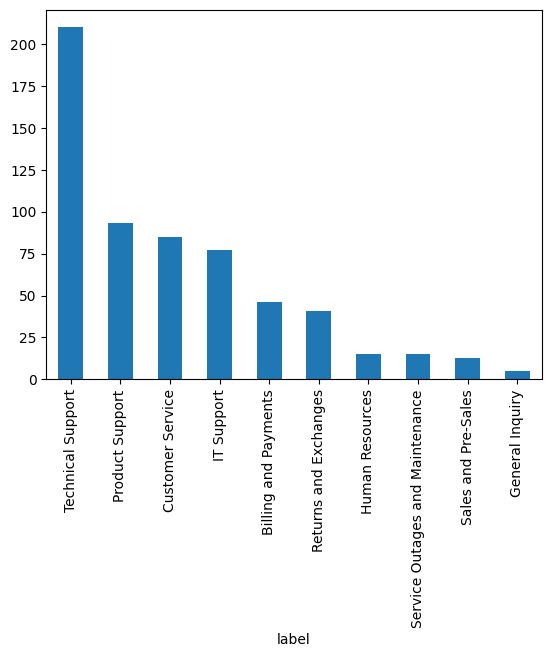

In [21]:
text_classification_df['label'].value_counts().plot.bar()
# imbalanced labels

<Axes: xlabel='language'>

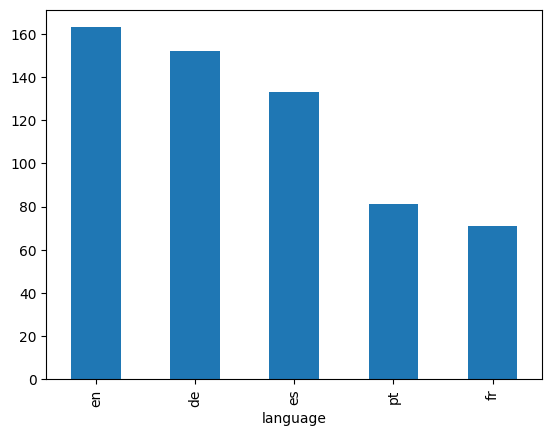

In [22]:
text_classification_df['language'].value_counts().plot.bar()

## Text preprocessing 

In [23]:
# first make bag of words
# lower case
# replace punctuations and numbers with space

text = list(text_classification_df['text'])

final_text =[]


for i in range(len(text)):

    r = re.sub('[^a-zA-Z]', ' ', text[i])

    r = r.lower()
    
    bow = nltk.word_tokenize(r) # make bag of words
    
    final_text.append(bow)

text_classification_df['text'] = final_text
text_classification_df

,label,language,text
0,Customer Service,de,"[anfrage, zu, den, spezifikationen, und, anpas..."
1,Product Support,fr,"[d, connexions, fr, quentes, et, plantages, le..."
2,Returns and Exchanges,es,"[problema, de, sonido, dell, xps, problema, co..."
3,Product Support,fr,"[assistance, requise, pour, la, configuration,..."
4,Human Resources,pt,"[urgente, assist, ncia, imediata, necess, ria,..."
...,...,...,...
595,IT Support,es,"[urgente, problema, de, conectividad, del, rou..."
596,Technical Support,es,"[necesito, ayuda, con, el, despliegue, de, un,..."
597,Technical Support,es,"[necesito, soporte, urgente, estimado, soporte..."
598,Service Outages and Maintenance,pt,"[problema, de, erro, de, servidor, caro, supor..."


In [24]:
# removing stopwords of each language from its bag of words

for i in range(len(text_classification_df)):
    
    if text_classification_df.loc[i, 'language'] == 'en':
        text_classification_df['text'][i] = [word for word in text_classification_df.loc[i, 'text'] if word not in stopwords.words('english')]
    
    elif text_classification_df['language'][i] == 'de':
        text_classification_df['text'][i] = [word for word in text_classification_df.loc[i, 'text'] if word not in stopwords.words('german')]

            
    elif text_classification_df.loc[i, 'language'] == 'es':
        text_classification_df['text'][i] = [word for word in text_classification_df.loc[i, 'text'] if word not in stopwords.words('spanish')]
    
    elif text_classification_df.loc[i, 'language'] == 'pt':
        text_classification_df['text'][i] = [word for word in text_classification_df.loc[i, 'text'] if word not in stopwords.words('portuguese')]
    
    else:
        text_classification_df['text'][i] = [word for word in text_classification_df.loc[i, 'text'] if word not in stopwords.words('french')]
        
        
text_classification_df
                        

,label,language,text
0,Customer Service,de,"[anfrage, spezifikationen, anpassungsoptionen,..."
1,Product Support,fr,"[connexions, fr, quentes, plantages, client, s..."
2,Returns and Exchanges,es,"[problema, sonido, dell, xps, problema, sonido..."
3,Product Support,fr,"[assistance, requise, configuration, tableau, ..."
4,Human Resources,pt,"[urgente, assist, ncia, imediata, necess, ria,..."
...,...,...,...
595,IT Support,es,"[urgente, problema, conectividad, router, esti..."
596,Technical Support,es,"[necesito, ayuda, despliegue, nuevo, microserv..."
597,Technical Support,es,"[necesito, soporte, urgente, estimado, soporte..."
598,Service Outages and Maintenance,pt,"[problema, erro, servidor, caro, suporte, clie..."


In [25]:
try:
    # Load spaCy models with parser and NER disabled to optimize speed
    nlp_en = spacy.load('en_core_web_sm', disable=['parser', 'ner'])  # English
    nlp_es = spacy.load('es_core_news_sm', disable=['parser', 'ner'])  # Spanish
    nlp_de = spacy.load('de_core_news_sm', disable=['parser', 'ner'])  # German
    nlp_fr = spacy.load('fr_core_news_sm', disable=['parser', 'ner'])  # French
    nlp_pt = spacy.load('pt_core_news_sm', disable=['parser', 'ner'])  # Portuguese
    
except:
    # Download the language models
    ! python -m spacy download en_core_web_sm  # English
    ! python -m spacy download es_core_news_sm  # Spanish
    ! python -m spacy download de_core_news_sm  # German
    ! python -m spacy download fr_core_news_sm  # French
    ! python -m spacy download pt_core_news_sm  # Portuguese
    
    # Load spaCy models with parser and NER disabled to optimize speed
    nlp_en = spacy.load('en_core_web_sm', disable=['parser', 'ner'])  # English
    nlp_es = spacy.load('es_core_news_sm', disable=['parser', 'ner'])  # Spanish
    nlp_de = spacy.load('de_core_news_sm', disable=['parser', 'ner'])  # German
    nlp_fr = spacy.load('fr_core_news_sm', disable=['parser', 'ner'])  # French
    nlp_pt = spacy.load('pt_core_news_sm', disable=['parser', 'ner'])  # Portuguese

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 69.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 78.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 72.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_sm')
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 71.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 80.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [26]:
# lemmatization 

# Function to get lemmatization using a specific language model
def lemmatize_word(word, nlp):
    doc = nlp(word)
    return [token.lemma_ for token in doc][0]  # Return the first lemma

# Applying lemmatization for words in each bag of words and combine words

for i in range(len(text_classification_df)):
    
    if text_classification_df.loc[i, 'language'] == 'en':
        text_classification_df['text'][i] = [lemmatize_word(word, nlp_en) for word in text_classification_df.loc[i, 'text']]
    
    elif text_classification_df['language'][i] == 'de':
        text_classification_df['text'][i] = [lemmatize_word(word, nlp_de) for word in text_classification_df.loc[i, 'text']]

            
    elif text_classification_df.loc[i, 'language'] == 'es':
        text_classification_df['text'][i] = [lemmatize_word(word, nlp_es) for word in text_classification_df.loc[i, 'text']]
    
    elif text_classification_df.loc[i, 'language'] == 'pt':
        text_classification_df['text'][i] = [lemmatize_word(word, nlp_pt) for word in text_classification_df.loc[i, 'text']]
    
    else:
        text_classification_df['text'][i] = [lemmatize_word(word, nlp_fr) for word in text_classification_df.loc[i, 'text']]
        
    text_classification_df['text'][i] = ' '.join(text_classification_df['text'][i])

text_classification_df

,label,language,text
0,Customer Service,de,Anfrage Spezifikation anpassungsoptionen Macbo...
1,Product Support,fr,connexion fr quente plantage client signal con...
2,Returns and Exchanges,es,problema sonido dell xps problema sonido manej...
3,Product Support,fr,assistance requérir configuration tableau scru...
4,Human Resources,pt,urgente assist ncia imediato necess rio falha ...
...,...,...,...
595,IT Support,es,urgente problema conectividad router estimado ...
596,Technical Support,es,necesitar ayuda despliegue nuevo microservicio...
597,Technical Support,es,necesitar soportir urgente estimado soportir c...
598,Service Outages and Maintenance,pt,problema erro servidor caro suporte cliente Se...


## logistic regression

In [27]:
# import libraries for logistic regression
from sklearn.feature_extraction.text import CountVectorizer #  for converting text data into a numeric format.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [28]:
# map labels from text to numeric values
print(text_classification_df['label'].nunique())
text_classification_df['label'].unique()
# we should map the labels from 0 to 9 respectively as they are written below

10


array(['Customer Service', 'Product Support', 'Returns and Exchanges',
       'Human Resources', 'Billing and Payments', 'Technical Support',
       'IT Support', 'Sales and Pre-Sales', 'General Inquiry',
       'Service Outages and Maintenance'], dtype=object)

In [29]:
text_classification_df['numeric_labels'] = text_classification_df['label'].map({'Customer Service': 0,
       'Product Support':1, 'Returns and Exchanges':2,
       'Human Resources':3 , 'Billing and Payments' : 4, 'Technical Support': 5,
       'IT Support':6 , 'Sales and Pre-Sales':7 , 'General Inquiry':8 ,
       'Service Outages and Maintenance':9 })

In [30]:
text_classification_df

,label,language,text,numeric_labels
0,Customer Service,de,Anfrage Spezifikation anpassungsoptionen Macbo...,0
1,Product Support,fr,connexion fr quente plantage client signal con...,1
2,Returns and Exchanges,es,problema sonido dell xps problema sonido manej...,2
3,Product Support,fr,assistance requérir configuration tableau scru...,1
4,Human Resources,pt,urgente assist ncia imediato necess rio falha ...,3
...,...,...,...,...
595,IT Support,es,urgente problema conectividad router estimado ...,6
596,Technical Support,es,necesitar ayuda despliegue nuevo microservicio...,5
597,Technical Support,es,necesitar soportir urgente estimado soportir c...,5
598,Service Outages and Maintenance,pt,problema erro servidor caro suporte cliente Se...,9


In [31]:
# text vectorization
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(text_classification_df['text'])
y = text_classification_df['numeric_labels']

In [32]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [33]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [34]:
# Make Predictions
y_pred = model.predict(X_test)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
accuracy # since we have unbalanced labels, accuracy is not a good factor

0.6444444444444445

<Axes: xlabel='numeric_labels'>

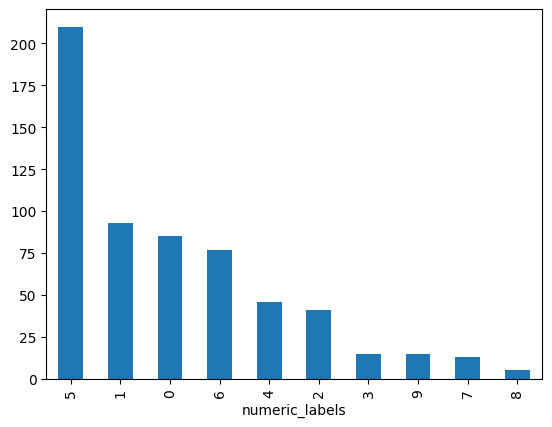

In [35]:
text_classification_df['numeric_labels'].value_counts().plot.bar()

In [36]:
# For a more detailed report:
# Use classification_report to see precision, recall, and F1-score.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.62      0.54        16
           1       0.54      0.59      0.57        22
           2       0.83      0.38      0.53        13
           3       1.00      0.40      0.57         5
           4       1.00      0.83      0.91        12
           5       0.62      0.81      0.71        74
           6       0.67      0.37      0.48        27
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00         2
           9       0.00      0.00      0.00         5

    accuracy                           0.64       180
   macro avg       0.71      0.60      0.63       180
weighted avg       0.65      0.64      0.63       180



for 7 and 8 and 4 the reports are good, as their numbers are less and most of the key metrics are not good, we can say that logistic regression is not an ideal model for multilingual-multiclass text classification
weighted avg and accuracy are not good enough

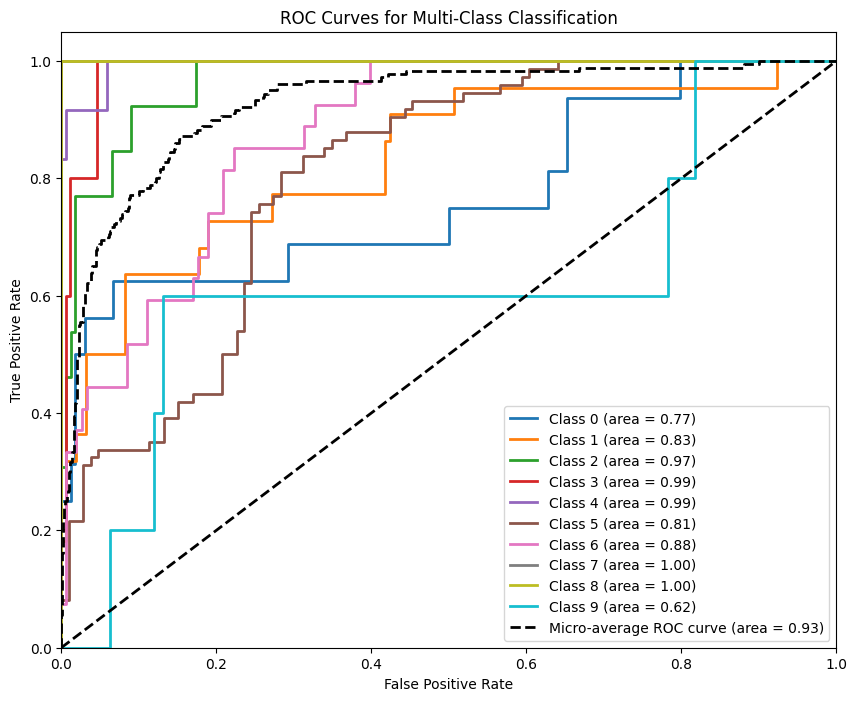

Weighted Average ROC AUC: 0.85


In [37]:
# ROC AUC:
# Binarize the output for multi-class (10 classes from 0 to 9)
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, roc_curve, auc

y_test_binarized = label_binarize(y_test, classes=np.arange(10))
n_classes = y_test_binarized.shape[1]

# Get the predicted probabilities for each class
y_score = model.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    

# Compute micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve for each class and the micro-average ROC curve
plt.figure(figsize=(10, 8))
colors = plt.cm.get_cmap("tab10").colors  # Colors for the classes

for i, color in enumerate(colors[:n_classes]):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (area = {roc_auc[i]:0.2f})')

# Plot the micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"], color='black', linestyle='--', lw=2, label=f'Micro-average ROC curve (area = {roc_auc["micro"]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multi-Class Classification')
plt.legend(loc="lower right")
plt.show()

# Calculate and print the weighted-average ROC AUC
weighted_roc_auc = roc_auc_score(y_test_binarized, y_score, multi_class="ovr", average="weighted")
print(f'Weighted Average ROC AUC: {weighted_roc_auc:.2f}')

the roc auc is not too bad. logistic regression can be considered as a model for multilingual multiclass text classification. The weighted average ROC AUC is promising.

## LaBSE model

### I decided to use LaBSE model for several reasons:
* The model supports 109 languages
* The model is trained to generate similar embeddings for bilingual sentence pairs that are translations of each other.

### It is pretrained model. I should fine tune the model and train the pretrained model with customer support emails dataset

In [38]:
# import libraries for the model
import tensorflow_hub as hub
import tensorflow as tf
import tensorflow_text as text  # Needed for loading universal-sentence-encoder-cmlm/multilingual-preprocess
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout
from tensorflow import keras
from tensorflow.keras import layers



2024-11-20 11:57:54.932643: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-20 11:57:54.932807: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-20 11:57:55.090812: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### prepare inputs and their labels

In [39]:
labse_df= tickets_df[['subject', 'body', 'queue']]

In [40]:
# import ' ' instead of one nan value in the subject
labse_df.fillna(' ', inplace=True)

In [41]:
labse_df['text'] = [labse_df['subject'][i] + '. '+ labse_df['body'][i] for i in range(len(labse_df))]

In [42]:
labse_df.drop(['subject', 'body'], inplace=True, axis=1)

In [43]:
labse_df.columns=['label', 'text']

In [44]:
labse_df

,label,text
0,Customer Service,Anfrage zu den Spezifikationen und Anpassungso...
1,Product Support,Déconnexions fréquentes et plantages. Le clien...
2,Returns and Exchanges,Problema de sonido Dell XPS. Problema con el s...
3,Product Support,Assistance requise pour la configuration du ta...
4,Human Resources,Urgente: Assistência Imediata Necessária para ...
...,...,...
595,IT Support,Urgente: Problema de Conectividad del Router. ...
596,Technical Support,Necesito ayuda con el despliegue de un nuevo m...
597,Technical Support,Necesito soporte urgente. Estimado soporte al ...
598,Service Outages and Maintenance,Problema de Erro de Servidor. Caro Suporte ao ...


In [45]:
labse_df['label'].value_counts()

label
Technical Support                  210
Product Support                     93
Customer Service                    85
IT Support                          77
Billing and Payments                46
Returns and Exchanges               41
Human Resources                     15
Service Outages and Maintenance     15
Sales and Pre-Sales                 13
General Inquiry                      5
Name: count, dtype: int64

In [46]:

# Encode labels to numbers
labse_df['label'] = labse_df['label'].map({'Customer Service': 0,
       'Product Support':1, 'Returns and Exchanges':2,
       'Human Resources':3 , 'Billing and Payments' : 4, 'Technical Support': 5,
       'IT Support':6 , 'Sales and Pre-Sales':7 , 'General Inquiry':8 ,
       'Service Outages and Maintenance':9 })

# Check class distribution
class_counts = labse_df['label'].value_counts()
print("Class distribution:\n", class_counts)

Class distribution:
 label
5    210
1     93
0     85
6     77
4     46
2     41
3     15
9     15
7     13
8      5
Name: count, dtype: int64


In [47]:
labse_df

,label,text
0,0,Anfrage zu den Spezifikationen und Anpassungso...
1,1,Déconnexions fréquentes et plantages. Le clien...
2,2,Problema de sonido Dell XPS. Problema con el s...
3,1,Assistance requise pour la configuration du ta...
4,3,Urgente: Assistência Imediata Necessária para ...
...,...,...
595,6,Urgente: Problema de Conectividad del Router. ...
596,5,Necesito ayuda con el despliegue de un nuevo m...
597,5,Necesito soporte urgente. Estimado soporte al ...
598,9,Problema de Erro de Servidor. Caro Suporte ao ...


In [48]:
'''def normalization(embeds):
    norms = np.linalg.norm(embeds, 2, axis=1, keepdims=True)
    return embeds/norms


# BERT
preprocessor = hub.KerasLayer(
    "https://kaggle.com/models/google/universal-sentence-encoder/TensorFlow2/cmlm-multilingual-preprocess/2")
encoder = hub.KerasLayer("https://www.kaggle.com/models/google/labse/TensorFlow2/labse/2", trainable=False)
'''

'''def model1():
    
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
    encoder_inputs = preprocessor(text_input)
    outputs = encoder(encoder_inputs)["default"]
    outputs = normalization(outputs)
    
    # Dense layers 
    outputs = Dense(512, activation='relu')(outputs)
    outputs = Dropout(0.2)(outputs)
    outputs = Dense(128, activation='relu')(outputs)
    outputs = Dense(10, activation='softmax')(outputs)

    return tf.keras.Model(text_input, outputs)



def model2():
    
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
    encoder_inputs = preprocessor(text_input)
    outputs = encoder(encoder_inputs)

    net = outputs['pooled_output']
    net = tf.keras.layers.Dropout(0.1)(net)
    net = tf.keras.layers.Dense(10, name='softmax')(net)
    return tf.keras.Model(text_input, net)
'''
'''
def model():
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='Input')
    encoder_inputs = preprocessor(text_input)
    outputs = encoder(encoder_inputs)["default"]
    outputs = normalization(outputs)

    # Dense layers with reduced complexity
    outputs = Dense(512, activation='relu')(outputs)
    outputs = Dropout(0.1)(outputs)
    outputs = Dense(128, activation='relu')(outputs)
    outputs = Dense(10, activation='softmax')(outputs)  # 10 classes

    return tf.keras.Model(inputs= text_input, outputs= outputs)

classifier_model = model()

'''
'''
# Input layer
model_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='Input')

# Preprocessor and encoder
outputs = encoder(model_input)["default"]

# Normalize embeddings
norms = tf.norm(outputs, axis=1, keepdims=True)
outputs = outputs / norms

# Dense layers
outputs = Dense(512, activation='relu')(outputs)
outputs = Dropout(0.1)(outputs)
outputs = Dense(128, activation='relu')(outputs)
outputs = Dense(10, activation='softmax')(outputs)  # 10 classes

# Create the model
classifier_model = tf.keras.Model(inputs=text_input, outputs=outputs)'''

'\n# Input layer\nmodel_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name=\'Input\')\n\n# Preprocessor and encoder\noutputs = encoder(model_input)["default"]\n\n# Normalize embeddings\nnorms = tf.norm(outputs, axis=1, keepdims=True)\noutputs = outputs / norms\n\n# Dense layers\noutputs = Dense(512, activation=\'relu\')(outputs)\noutputs = Dropout(0.1)(outputs)\noutputs = Dense(128, activation=\'relu\')(outputs)\noutputs = Dense(10, activation=\'softmax\')(outputs)  # 10 classes\n\n# Create the model\nclassifier_model = tf.keras.Model(inputs=text_input, outputs=outputs)'

In [49]:
def normalization(embeds):
    norms = tf.norm(embeds, ord=2, axis=1, keepdims=True)
    return embeds / norms



class TextClassifier(tf.keras.Model):
    def __init__(self, preprocess_url, encoder_url):
        super(TextClassifier, self).__init__()
        
        # Load the preprocessor and encoder
        self.preprocess_layer = hub.KerasLayer(preprocess_url)
        self.encoder_layer = hub.KerasLayer(encoder_url, trainable=True)
        
        # Define the classification head explicitly
        self.dense1 = Dense(512, activation='relu')
        self.dropout = Dropout(0.1)
        self.dense2 = Dense(128, activation='relu')
        self.output_layer = Dense(10, activation='softmax')
 
    # @tf.function
    def call(self, inputs):

        # Apply preprocessing
        preprocessed_text = self.preprocess_layer(inputs)

        # Apply BERT encoder
        encoder_outputs = self.encoder_layer(preprocessed_text)["default"]

        output = normalization(encoder_outputs)

        # Pass through classification head
        output = self.dense1(output)
        output = self.dropout(output)
        output = self.dense2(output)
        output = self.output_layer(output)
        
        return output

# Correct TensorFlow Hub URLs
#preprocess_url = "https://kaggle.com/models/google/universal-sentence-encoder/TensorFlow2/cmlm-multilingual-preprocess/2"
#encoder_url = "https://www.kaggle.com/models/google/labse/TensorFlow2/labse/2"
preprocess_url='https://tfhub.dev/google/universal-sentence-encoder-cmlm/multilingual-preprocess/2'
encoder_url='https://tfhub.dev/google/LaBSE/2'
 
# Instantiate the custom model
model = TextClassifier(preprocess_url, encoder_url)

# Define input shape
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')

# Get model outputs
outputs = model(text_input)



# Compile the model

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),  
              metrics=['accuracy'])


In [50]:

# Split the dataset into training and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(labse_df['text'], labse_df['label'], test_size=0.3, stratify=labse_df['label'], random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)


# Prepare the datasets
X_train = tf.constant(X_train.tolist())
X_valid = tf.constant(X_valid.tolist())
X_test = tf.constant(X_test.tolist())



In [51]:
print(X_valid.shape)
print(y_valid.shape)

(90,)
(90,)


Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 137s 18s/step - accuracy: 0.2430 - loss: 2.2166 - val_accuracy: 0.3444 - val_loss: 1.8937
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 128s 19s/step - accuracy: 0.3536 - loss: 1.8266 - val_accuracy: 0.3444 - val_loss: 1.7456
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 128s 19s/step - accuracy: 0.3572 - loss: 1.7075 - val_accuracy: 0.3556 - val_loss: 1.6358
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 137s 18s/step - accuracy: 0.4494 - loss: 1.5175 - val_accuracy: 0.3889 - val_loss: 1.5378
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 140s 21s/step - accuracy: 0.5289 - loss: 1.3579 - val_accuracy: 0.5111 - val_loss: 1.4150
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 127s 18s/step - accuracy: 0.5946 - loss: 1.2357 - val_accuracy: 0.5111 - val_loss: 1.3020
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 126s 18s/step - accuracy: 0.6072 - loss: 1.1303 - val_accuracy: 0.5333 - val_loss: 1.1804
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 126s 18s/step - accuracy: 0.6509 - loss: 1.0022 - val_accuracy: 0.6000 - val_loss:

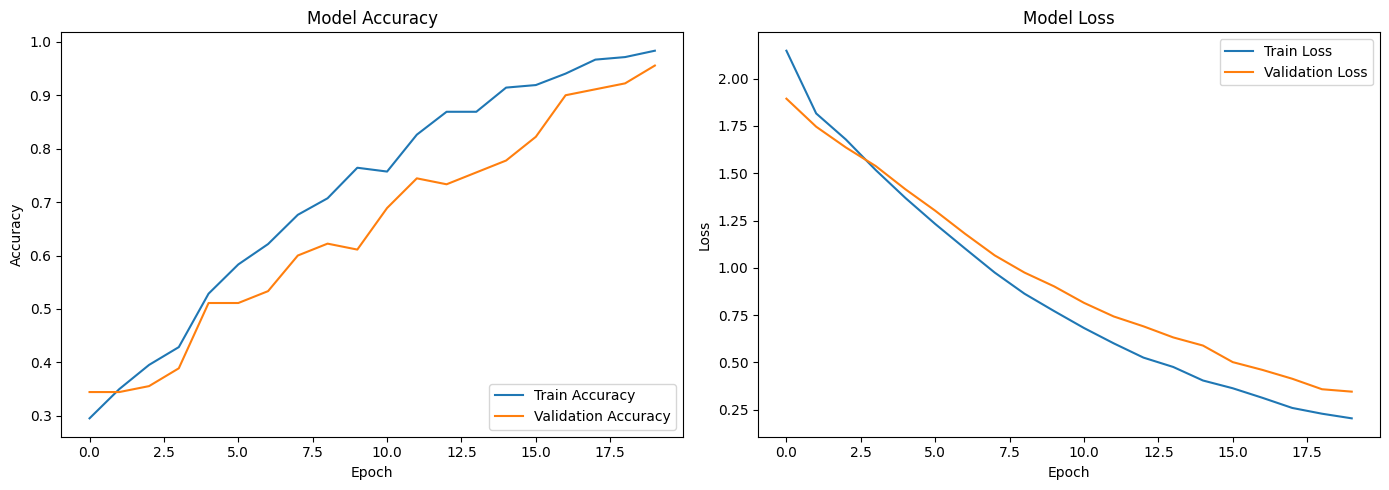

In [52]:


# Set up early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


 
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=64,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping]) 



# Plotting the training history
def plot_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(14, 5))
    
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='lower right')
    
    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')
    
    plt.tight_layout()
    plt.show()

# Call the function to plot the history
plot_history(history)

In [53]:
y_pred = model.predict(X_test)  

3/3 ━━━━━━━━━━━━━━━━━━━━ 23s 7s/step


In [54]:
y_pred = np.argmax(y_pred, axis = 1)

In [55]:
y_pred

array([5, 5, 8, 0, 1, 0, 5, 1, 1, 4, 5, 2, 5, 7, 0, 5, 6, 6, 1, 0, 6, 5,
       0, 5, 5, 5, 5, 6, 5, 2, 4, 0, 5, 2, 5, 5, 5, 3, 4, 1, 5, 5, 5, 2,
       5, 1, 6, 1, 5, 5, 6, 0, 0, 6, 6, 1, 5, 9, 0, 5, 5, 4, 5, 9, 3, 6,
       5, 5, 1, 4, 4, 5, 5, 2, 5, 1, 1, 0, 7, 1, 0, 2, 4, 5, 0, 5, 0, 0,
       5, 1])

In [56]:
# For a more detailed report on LaBSE model:
# Use classification_report to see precision, recall, and F1-score.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       0.85      0.79      0.81        14
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         7
           5       0.85      0.91      0.88        32
           6       1.00      0.82      0.90        11
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         2

    accuracy                           0.91        90
   macro avg       0.96      0.95      0.96        90
weighted avg       0.91      0.91      0.91        90



### with using LaBSE model we achieved accuracy = 0.92 in comparison with accuracy from logesticregression model that was 0.64 it is really good